<a href="https://colab.research.google.com/github/JonathanItha/Bel20_Prediction/blob/main/Bel20_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [ ]:
bel20 = yf.download('^BFX', end='2023-01-01')
print(bel20.head())
#bel20future = yf.download('^BFX', end='2022-01-01')
#bel20future_hist = yf.download('^BFX', end='2022-03-01')

[*********************100%%**********************]  1 of 1 completed

                   Open         High          Low        Close    Adj Close  \
Date                                                                          
1991-04-09  1201.699951  1201.699951  1201.699951  1201.699951  1201.699951   
1991-04-10  1197.599976  1197.599976  1197.599976  1197.599976  1197.599976   
1991-04-11  1198.900024  1198.900024  1198.900024  1198.900024  1198.900024   
1991-04-12  1206.599976  1206.599976  1206.599976  1206.599976  1206.599976   
1991-04-15  1208.099976  1208.099976  1208.099976  1208.099976  1208.099976   

            Volume  
Date                
1991-04-09       0  
1991-04-10       0  
1991-04-11       0  
1991-04-12       0  
1991-04-15       0  


In [ ]:
print(bel20.describe())
print(bel20.info())

              Open         High          Low        Close    Adj Close  \
count  8050.000000  8050.000000  8050.000000  8050.000000  8050.000000   
mean   2804.619503  2820.613577  2786.575106  2804.071400  2804.071400   
std     918.760926   923.463232   913.774433   918.695490   918.695490   
min    1046.199951  1050.099976  1038.500000  1046.099976  1046.099976   
25%    2112.377563  2133.224976  2098.122559  2114.679993  2114.679993   
50%    2878.359985  2897.690063  2854.694946  2877.399902  2877.399902   
75%    3563.339905  3583.700012  3542.419983  3562.705017  3562.705017   
max    4737.319824  4759.009766  4733.049805  4756.819824  4756.819824   

             Volume  
count  8.050000e+03  
mean   9.164630e+06  
std    1.545392e+07  
min    0.000000e+00  
25%    0.000000e+00  
50%    0.000000e+00  
75%    1.498598e+07  
max    2.252646e+08  
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8050 entries, 1991-04-09 to 2022-12-30
Data columns (total 6 columns):
 #   Column

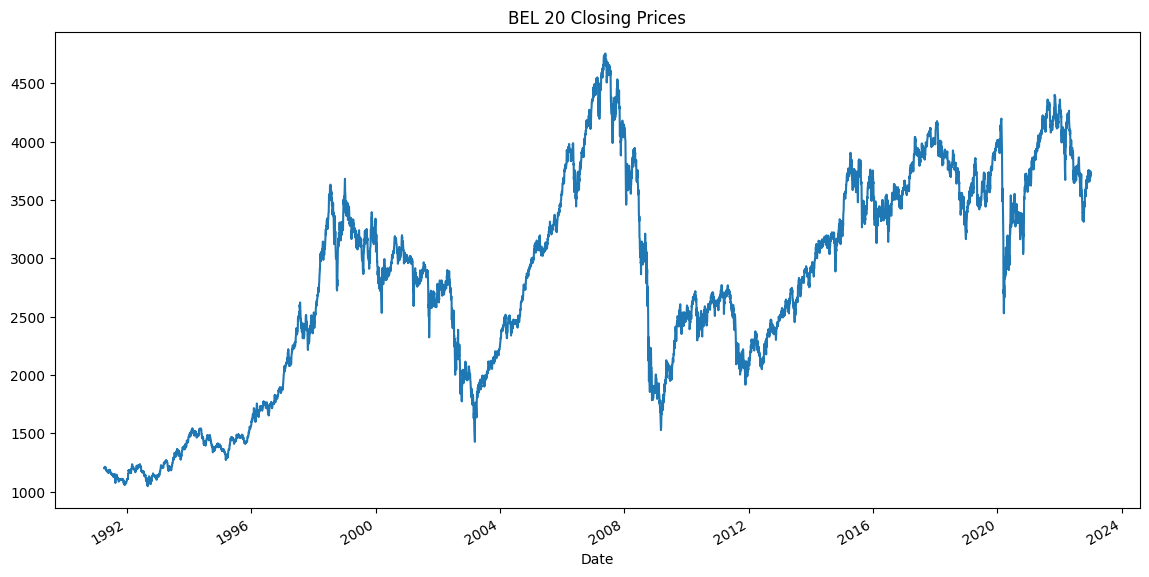

In [ ]:
bel20['Close'].plot(figsize=(14, 7))
plt.title('BEL 20 Closing Prices')
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
print(tf.__version__)

2.15.0


In [ ]:
bel20 = bel20['Close'].values
bel20 = bel20.reshape(-1, 1)

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
bel20 = scaler.fit_transform(bel20)

In [ ]:
x = []
y = []

In [ ]:
for i in range(260, len(bel20)):
  x.append(bel20[i - 260:i, 0])
  y.append(bel20[i, 0]) #analyse the 260 last days

In [ ]:
x = np.array(x)
y = np.array(y)

In [ ]:
x = np.reshape(x, (x.shape[0], x.shape[1], 1))
#print(x)

In [ ]:
model = Sequential()

In [ ]:
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(260, 1)))
model.add(Dropout(0.1))

model.add(LSTM(units=50, activation='relu',  return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(units=25))
model.add(Dense(units=1))

In [ ]:
#model.add(LSTM(units=40, activation='relu', return_sequences=True))
#model.add(Dropout(0.1))

In [ ]:
#model.add(LSTM(units=50, activation='relu', return_sequences=True))
#model.add(Dropout(0.1))

In [ ]:
#model.add(LSTM(units=60, activation='relu'))
#model.add(Dropout(0.1))

In [ ]:
#model.add(Dense(units=1))

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
split = int(0.98 * len(x))
x_train, x_test = x[:split], x[split:]
y_train, y_test = y[:split], y[split:]

In [ ]:
early_stopping = EarlyStopping(monitor='loss', patience=3, restore_best_weights=True)

In [ ]:
model.fit(x_train, y_train, epochs=50, batch_size=32, callbacks=[early_stopping])

Epoch 1/50
239/239 [==============================] - 69s 255ms/step - loss: 0.0108
Epoch 2/50
239/239 [==============================] - 58s 243ms/step - loss: 0.0026
Epoch 3/50
239/239 [==============================] - 58s 241ms/step - loss: 0.0019
Epoch 4/50
239/239 [==============================] - 60s 249ms/step - loss: 0.0017
Epoch 5/50
239/239 [==============================] - 56s 236ms/step - loss: 0.0016
Epoch 6/50
239/239 [==============================] - 56s 235ms/step - loss: 0.0016
Epoch 7/50
239/239 [==============================] - 57s 240ms/step - loss: 0.0016
Epoch 8/50
239/239 [==============================] - 56s 235ms/step - loss: 0.0015
Epoch 9/50
239/239 [==============================] - 56s 234ms/step - loss: 0.0015
Epoch 10/50
239/239 [==============================] - 57s 237ms/step - loss: 0.0015
Epoch 11/50
239/239 [==============================] - 57s 239ms/step - loss: 0.0014
Epoch 12/50
239/239 [==============================] - 58s 241ms/step - lo

In [ ]:
predictions = model.predict(x_test)

5/5 [==============================] - 1s 68ms/step


In [ ]:
predictions = scaler.inverse_transform(predictions)
actual_y_test = scaler.inverse_transform(y_test.reshape(-1, 1))
#print(predictions)
#print(actual_y_test)

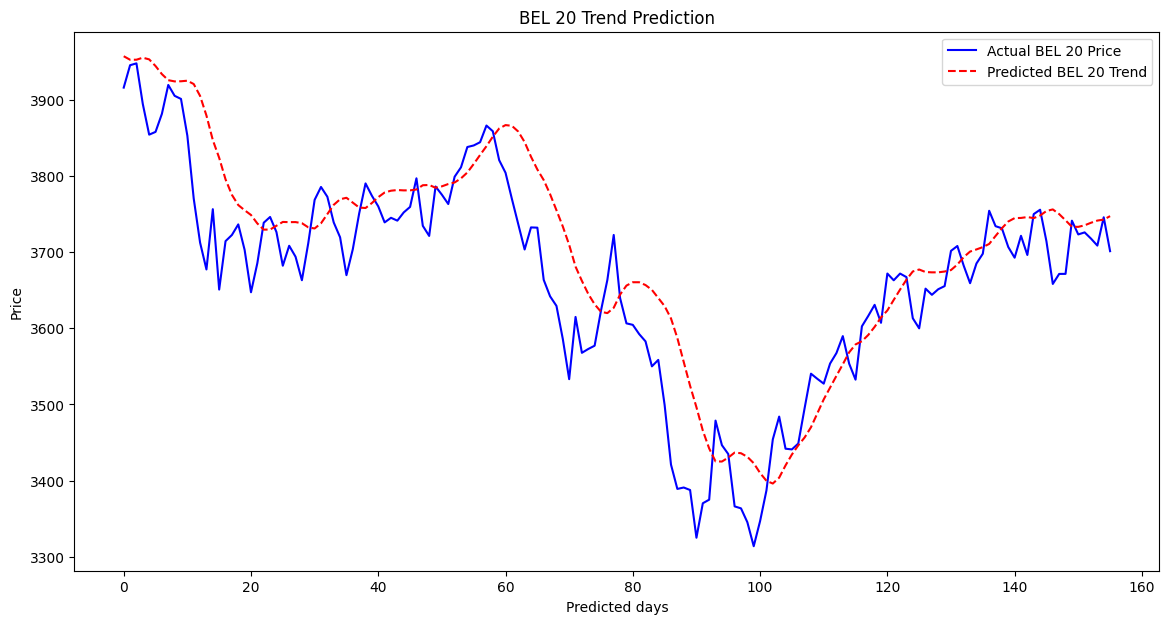

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(actual_y_test, color='blue', label='Actual BEL 20 Price')
plt.plot(predictions, color='red', label='Predicted BEL 20 Trend' ,  linestyle='dashed', markersize=4)
plt.title('BEL 20 Trend Prediction')
plt.xlabel('Predicted days')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
actual_prices = np.array(actual_y_test)
predicted_prices = np.array(predictions)
absolute_differences = np.abs(actual_prices - predicted_prices)
A = np.mean(absolute_differences)
print(absolute_differences.max())
print(absolute_differences.min())
print(f"The average of the absolute differences (A) is: {A}")

201.99169921875
0.104736328125
The average of the absolute differences (A) is: 53.393991323617755


Now I will create function to direclty analyse the composition of the bel20

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf

In [ ]:
#dowload stock
def download_stock_data(ticker, end_date):

    return yf.download(ticker, end=end_date)
#prepocesss
def preprocess_data(data, sequence_length):

    data = data['Close'].values.reshape(-1, 1)
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data)

    x, y = [], []
    for i in range(sequence_length, len(scaled_data)):
        x.append(scaled_data[i - sequence_length:i, 0])
        y.append(scaled_data[i, 0])

    x, y = np.array(x), np.array(y)
    x = np.reshape(x, (x.shape[0], x.shape[1], 1))

    return x, y, scaler
#LSTM Model
def build_and_train_model(x_train, y_train, sequence_length):
    model = Sequential([
        LSTM(units=50, activation='relu', return_sequences=True, input_shape=(sequence_length, 1)),
        Dropout(0.1),
        LSTM(units=50, activation='relu', return_sequences=False),
        Dropout(0.2),
        Dense(units=25),
        Dense(units=1)
    ])

    model.compile(optimizer='adam', loss='mean_squared_error')
    early_stopping = EarlyStopping(monitor='loss', patience=3, restore_best_weights=True)

    model.fit(x_train, y_train, epochs=50, batch_size=32, callbacks=[early_stopping])

    return model
#Prediction
def make_predictions(model, x_test, scaler):

    predictions = model.predict(x_test)
    predictions = scaler.inverse_transform(predictions)

    return predictions
#Plot
def plot_results(actual_y_test, predictions):

    plt.figure(figsize=(14, 7))
    plt.plot(actual_y_test, color='blue', label='Actual Price')
    plt.plot(predictions, color='red', label='Predicted Price', linestyle='dashed', markersize=4)
    plt.title('Stock Price Prediction')
    plt.xlabel('Predicted Day')
    plt.ylabel('Price')
    plt.legend()
    plt.show()
#Perf metric
def evaluate_performance(actual_y_test, predictions):

    absolute_differences = np.abs(actual_y_test - predictions)
    max_error = absolute_differences.max()
    min_error = absolute_differences.min()
    mean_error = np.mean(absolute_differences)

    print(f"Max error: {max_error}")
    print(f"Min error: {min_error}")
    print(f"Mean error: {mean_error}")



In [ ]:
#Fct to run
def main(ticker, end_date, sequence_length=260):

    data = download_stock_data(ticker, end_date)

    x, y, scaler = preprocess_data(data, sequence_length)

    split = int(0.98 * len(x))
    x_train, x_test = x[:split], x[split:]
    y_train, y_test = y[:split], y[split:]

    model = build_and_train_model(x_train, y_train, sequence_length)

    predictions = make_predictions(model, x_test, scaler)
    actual_y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

    plot_results(actual_y_test, predictions)

    evaluate_performance(actual_y_test, predictions)

# Example of using the main function
if __name__ == "__main__":
    main('AGS.BR', '2023-01-01')


In [ ]:
if __name__ == "__main__":
    main('UCB.BR', '2023-01-01')